In [1]:
import numpy as np
import matplotlib.pyplot as plt

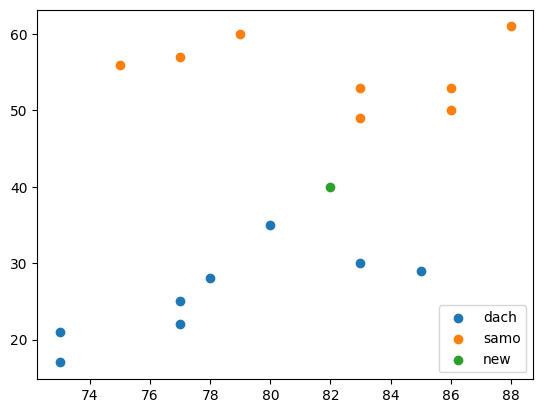

In [2]:
dach_l = [77,78,85,83,73,77,73,80]
dach_h = [25,28,29,30,21,22,17,35]
samo_l = [75,77,86,86,79,83,83,88]
samo_h = [56,57,50,53,60,53,49,61]

new_l = [82]
new_h = [40]

plt.figure()
plt.scatter(dach_l, dach_h, label='dach')
plt.scatter(samo_l, samo_h, label='samo')

plt.scatter(new_l, new_h, label='new')

plt.legend()
plt.show()

In [3]:
X_dach = np.column_stack([dach_l, dach_h])
y_dach = np.zeros(len(X_dach)) # np.zeros(x_dach.shape[0])

X_samo = np.column_stack([samo_l, samo_h])
y_samo = np.ones(len(X_dach))

X_train = np.concatenate([X_dach, X_samo])  # axis=0
y_train = np.concatenate([y_dach, y_samo])

X_test = np.array([[84, 42]])

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors가 k값
knn.fit(X_train, y_train)

knn.predict(X_test)

array([1.])

In [5]:
target = np.array([0] * 15 + [1] * 5)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
pred = np.array([0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1])
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [8]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print(confusion_matrix(target, pred))
print(recall_score(target, pred))
print(precision_score(target, pred))
print(f1_score(target, pred))
print(accuracy_score(target, pred))

[[7 8]
 [2 3]]
0.6
0.2727272727272727
0.37499999999999994
0.5


# 오후

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
X = iris.data
y = iris.target

In [4]:
mask = y != 0
X = X[mask]
y = y[mask]
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
y = y - 1

In [6]:
X = X[:, [0,2]]

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
lr = LogisticRegression(solver='liblinear', C=0.0001, random_state=1)
lr.fit(X_train, y_train)


LogisticRegression(C=0.0001, random_state=1, solver='liblinear')

In [8]:
prob = lr.predict_proba(X_test) # 예측확률

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thres = roc_curve(y_test, prob[:,1])

In [10]:
roc_auc_score(y_test, prob[:,1])

0.9733333333333333

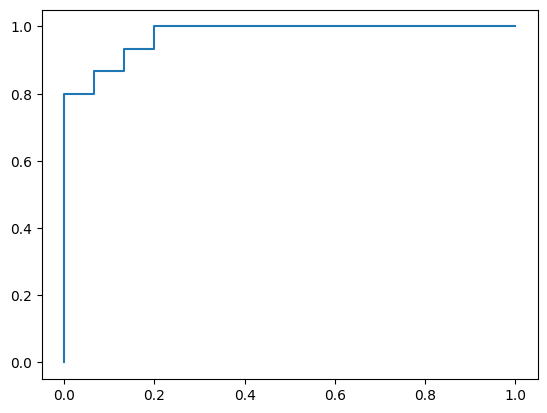

In [11]:
plt.figure()
plt.plot(fpr, tpr)
plt.show()

# 배깅

In [12]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

In [13]:
mask = y != 2
X = X[mask]
y = y[mask]

In [14]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


lr = LogisticRegression(solver='liblinear', C=1, random_state=1)
bag = BaggingClassifier(base_estimator=lr, n_estimators=500, n_jobs=-1) # CPU 코어 수를 지정 -1은 알아서

bag.fit(X_train, y_train)
p_test = bag.predict(X_test)

c:\Users\PC\Bcode\myvenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [15]:
print(f1_score(y_test, p_test))

lr.fit(X_train, y_train)
print(f1_score(y_test, lr.predict(X_test)))


NameError: name 'f1_score' is not defined

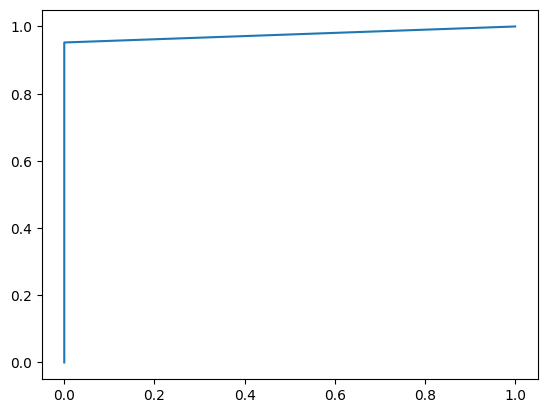

In [ ]:
fpr, tpr, thres = roc_curve(y_test, p_test)
roc_auc_score(y_test, p_test)
plt.figure()
plt.plot(fpr, tpr)
plt.show()

# AdaBoost

### 개개별의 모델이 과소적합이 잘 되기 때문에, 
### 데이터 수가 적다면 오히려 성능이 떨어짐

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=lr, n_estimators=500, learning_rate=0.1)

ada.fit(X_train, y_train)
p_test = ada.predict(X_test)
f1_score(y_test, p_test)

c:\Users\PC\Bcode\myvenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


NameError: name 'f1_score' is not defined

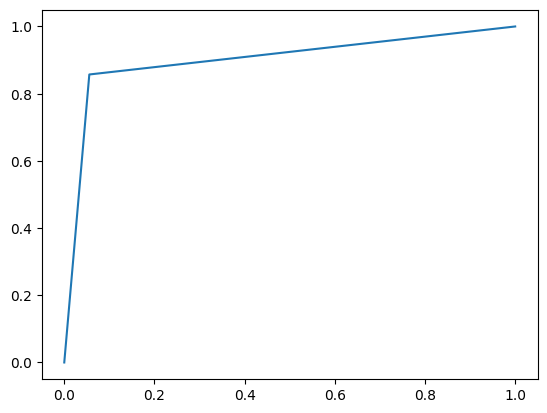

In [ ]:
fpr, tpr, thres = roc_curve(y_test, p_test)
roc_auc_score(y_test, p_test)
plt.figure()
plt.plot(fpr, tpr)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data
y = iris.target

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file=('iris_tree.dot'), feature_names=iris.feature_names)

In [16]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

NameError: name 'tree' is not defined

<Figure size 640x480 with 0 Axes>

# 5일차

In [17]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data
y = iris.target

tree = DecisionTreeClassifier(max_depth=4) # 7은 과적합 상태
tree.fit(X[:, [0,2]], y)

DecisionTreeClassifier(max_depth=4)

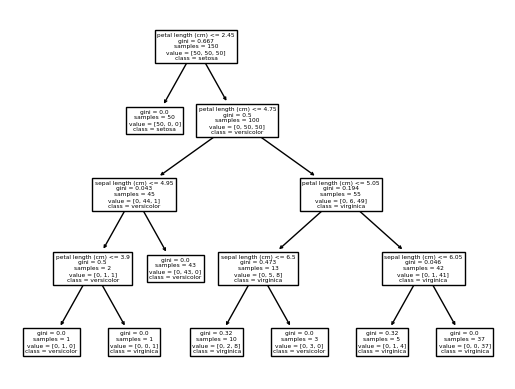

In [18]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree, feature_names=iris.feature_names[::2], class_names=iris.target_names)
plt.show()

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

C:\Users\PC\AppData\Local\Temp\ipykernel_3788\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_3788\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


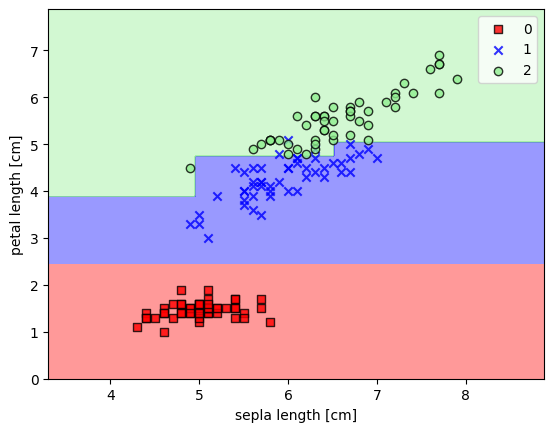

In [20]:
plot_decision_regions(X[:, [0,2]], y, tree)
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', max_depth=4, n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(X[:, [0,2]], y)

RandomForestClassifier(max_depth=4, n_estimators=25, n_jobs=-1, random_state=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_3788\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_3788\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


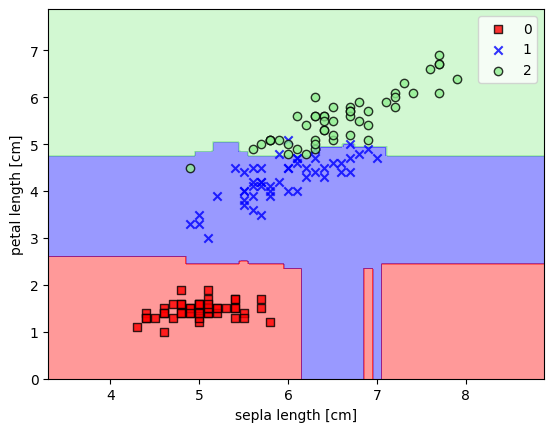

In [22]:
plot_decision_regions(X[:, [0,2]], y, forest)
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X[:, [0,2]])

In [24]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1, random_state=1)
svc.fit(X_sc, y)

SVC(C=1, kernel='linear', random_state=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_3788\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_3788\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


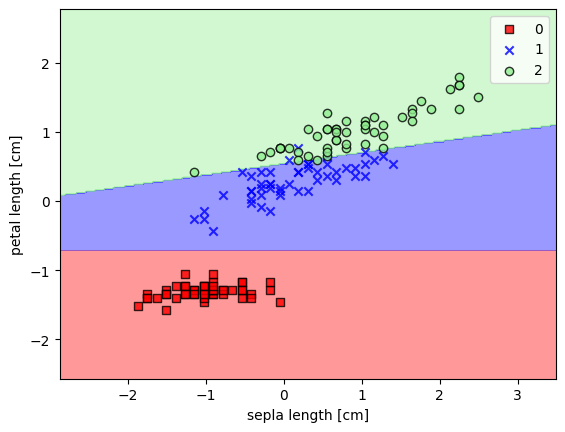

In [25]:
plot_decision_regions(X_sc, y, svc)
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

In [30]:
from sklearn.svm import SVC

# gamma를 적게 하면 과대적합을 방지 가능
# C를 적게하면 과소적합, 크게하면 과대적합
svc = SVC(kernel='rbf', C=1, random_state=1, gamma=1)
svc.fit(X_sc, y)

SVC(C=1, gamma=1, random_state=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_3788\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_3788\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


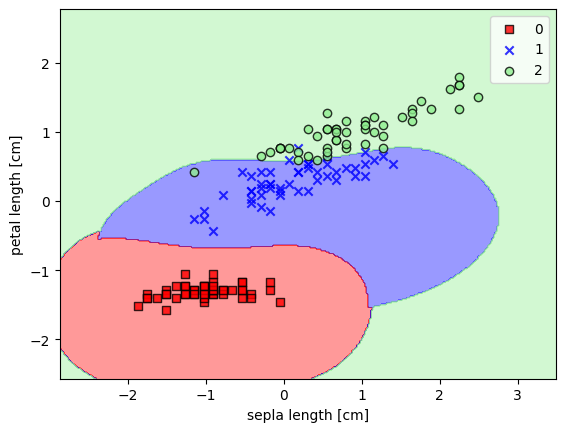

In [31]:
plot_decision_regions(X_sc, y, svc)
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

### 랜덤포레스트에서 중요한 특성을 선택하기 위한 중간다리 방법
### corr 와 비슷한 쓰임새로 사용
### 이상치 결측치 확인 후에 바로 train test 분할 -> 스케일링 등등

In [38]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=1)

# 정렬방법

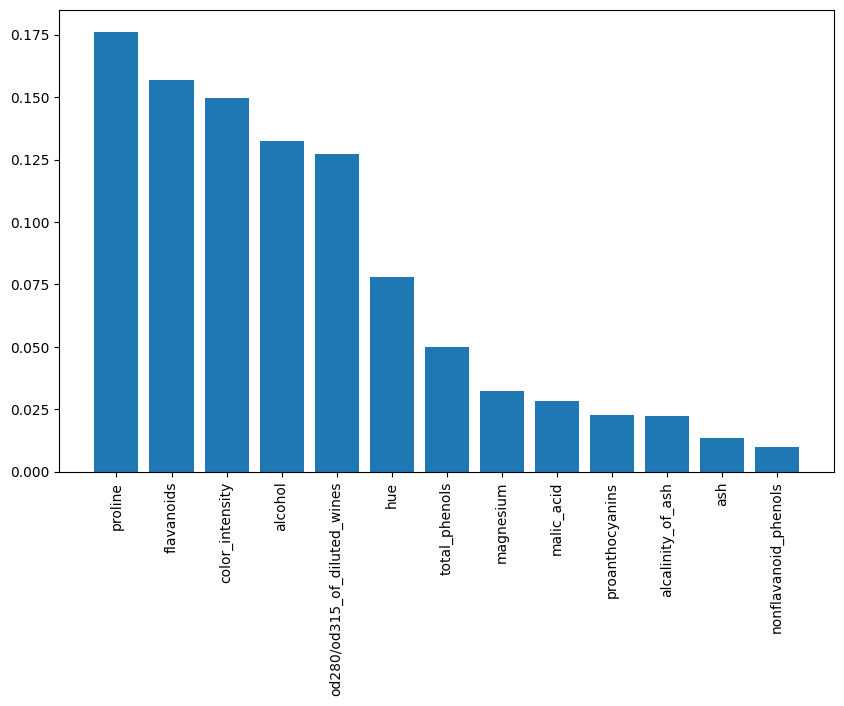

In [71]:
ipt = forest.feature_importances_
idxs = np.argsort(ipt)[::-1] # 역순

plt.figure(figsize=(10,6))
plt.bar(np.array(wine.feature_names)[idxs], ipt[idxs]) # ipt[idxs 중요도
plt.xticks(rotation=90)
plt.show()

In [45]:
list(zip(ipt, wine.feature_names))

[(0.13251383629204885, 'alcohol'),
 (0.028276894210034965, 'malic_acid'),
 (0.013446080574032874, 'ash'),
 (0.02252494029889849, 'alcalinity_of_ash'),
 (0.03250827419255629, 'magnesium'),
 (0.049891969860720545, 'total_phenols'),
 (0.15702209208508877, 'flavanoids'),
 (0.009930479576169332, 'nonflavanoid_phenols'),
 (0.022781997198579276, 'proanthocyanins'),
 (0.14978792044587858, 'color_intensity'),
 (0.07799230624561584, 'hue'),
 (0.1271268205309999, 'od280/od315_of_diluted_wines'),
 (0.1761963884893764, 'proline')]

In [73]:
# np.argsort(ipt)  오름차순으로 정렬된 상태에서 원본의 인덱스 번호가 나옴 
for i in np.argsort(ipt):
    print(wine.feature_names[i])

nonflavanoid_phenols
ash
alcalinity_of_ash
proanthocyanins
malic_acid
magnesium
total_phenols
hue
od280/od315_of_diluted_wines
alcohol
color_intensity
flavanoids
proline


In [74]:
X = iris.data
y = iris.target

In [75]:
from sklearn.decomposition import PCA

#분할 하고 해야 함. 지금은 생략
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# pca.fit_transform(X_train)
# pca.transform(X_test)

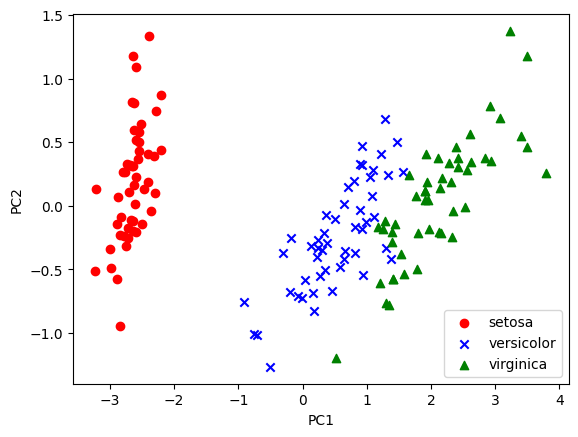

In [78]:
plt.figure()
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', marker='o', label='setosa')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], color='green', marker='^', label='virginica')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 분할 해야 함. 생략
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
# lda.fit_transform(X_train, y_train)
# lda.transform(X_test)

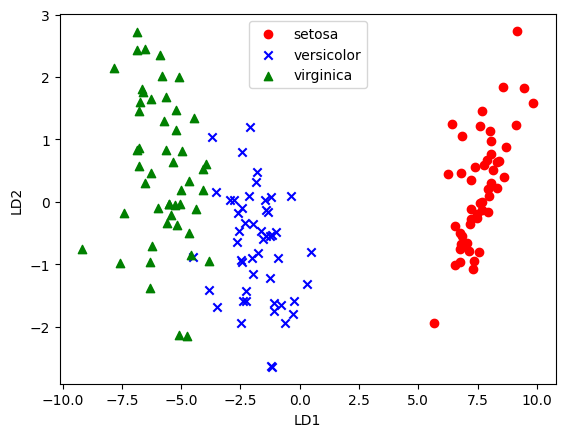

In [82]:
plt.figure()
plt.scatter(X_lda[y==0, 0], X_lda[y==0, 1], color='red', marker='o', label='setosa')
plt.scatter(X_lda[y==1, 0], X_lda[y==1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X_lda[y==2, 0], X_lda[y==2, 1], color='green', marker='^', label='virginica')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

머신러닝 수행 과정   ML workflow

데이터 수집 <- 센서  
데이터 가공 및 통계 <- 넘파이, 판다스  
데이터 전처리 1 (결측치/이상치 처리) <- 넘파이, 판다스  
train_test_split  
데이터 전처리 2 (스케일링/값 보정) <- 넘파이, OpenCV(이미지)  
특성 선택 (상관분석, 차원축소, 특성중요도) <- 판다스, sklearn         !train data로만!  
모델 선택 (모델 종류, 하이퍼파라미터-규제,강도) <- sklearn    		!train data로만!  
[비선형 경우] 커널 트릭 및 모델 학습  !train data로만!  
모델 테스트( 4~8 과정 따라 transform/predict )  


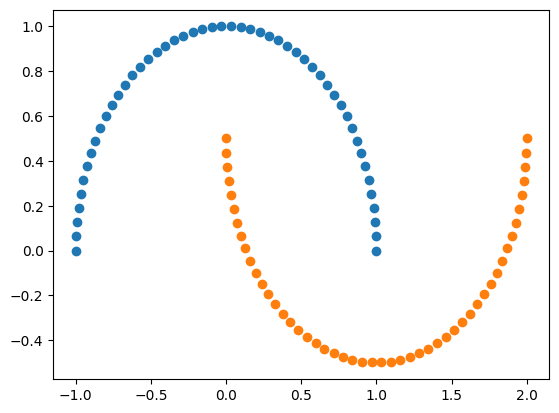

In [88]:
from sklearn.datasets import make_moons, make_circles

X, y = make_moons(n_samples=100, random_state=1)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

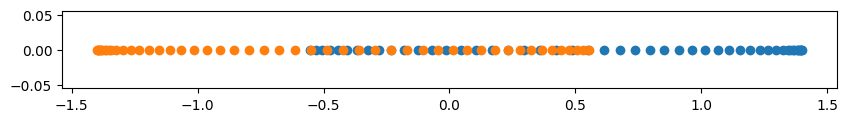

In [91]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,1))
plt.scatter(X_pca[y==0,0], np.zeros_like(X_pca[y==0,0])) # np.zeros(X_pca[y==0,0].shape)
plt.scatter(X_pca[y==1,0], np.zeros_like(X_pca[y==1,0]))
plt.show()

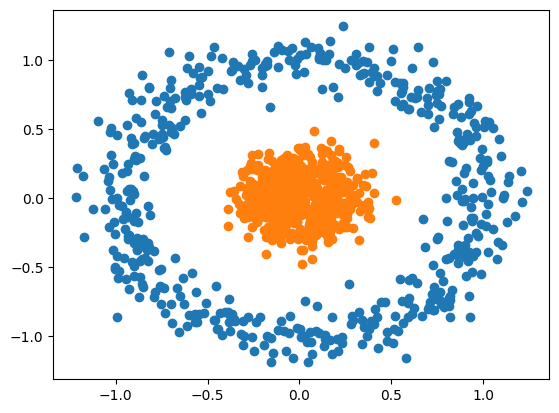

In [99]:
from sklearn.datasets import make_moons, make_circles

X, y = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.2)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

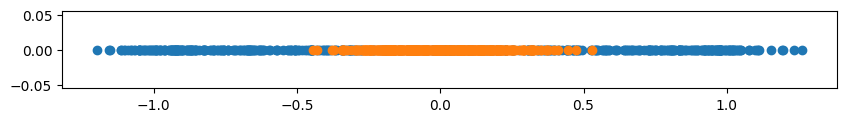

In [100]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,1))
plt.scatter(X_pca[y==0,0], np.zeros_like(X_pca[y==0,0])) # np.zeros(X_pca[y==0,0].shape)
plt.scatter(X_pca[y==1,0], np.zeros_like(X_pca[y==1,0]))
plt.show()

# 커널PCA

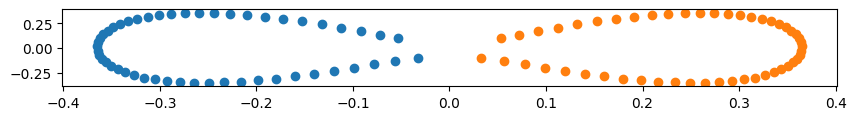

In [103]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=1) #, noise=0.1, factor=0.2)

pca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,1))
plt.scatter(X_pca[y==0,0], X_pca[y==0,1]) # np.zeros(X_pca[y==0,0].shape)
plt.scatter(X_pca[y==1,0], X_pca[y==1,1])
plt.show()

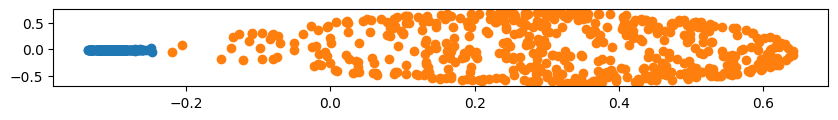

In [119]:
from sklearn.decomposition import KernelPCA

X, y = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.2)

pca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,1))
plt.scatter(X_pca[y==0,0], X_pca[y==0,1]) # np.zeros(X_pca[y==0,0].shape)
plt.scatter(X_pca[y==1,0], X_pca[y==1,1])
plt.show()